# Linear Regression using Tensorflow

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn-whitegrid')

In [3]:
alpha = 0.05 #Learning Rate
epochs = 500
m = 100 #Number of samples

In [4]:
X = np.linspace(0,50,m)
y = 3.5 * X + 10 + 5 * np.random.normal(0,2.5,np.size(X))

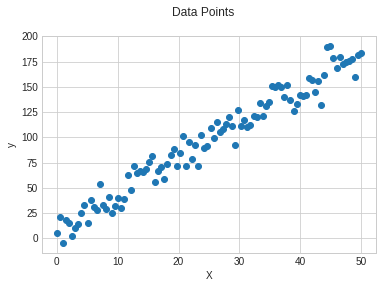

In [5]:
fig = plt.figure()
plt.plot(X, y, 'o')
fig.suptitle('Data Points')
plt.xlabel('X')
plt.ylabel('y');

In [6]:
X_placeholder = tf.placeholder(tf.float32)
y_placeholder = tf.placeholder(tf.float32)

In [7]:
w = tf.Variable(np.random.randn(), name = 'weight')
b = tf.Variable(np.random.randn(), name = 'bias')

In [8]:
#Prediction
y_hat = w * X_placeholder + b

In [9]:
#Loss Fuction
mse = (y_hat - y_placeholder)**2 / (2 * m)
J = tf.reduce_sum(mse)

In [10]:
#Optimizer (Gradient Descent)
opt = tf.train.GradientDescentOptimizer(alpha).minimize(J)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
#Variable Initialization
init_var = tf.global_variables_initializer()

In [12]:
with tf.Session() as session:
    session.run(init_var)
    for n_iteration in range(0, epochs):
      for x_current,y_current in zip(X, y):
        session.run(opt, feed_dict = {X_placeholder : x_current, y_placeholder: y_current})
      if n_iteration%50 == 0:
        w_current = session.run(w)
        b_current = session.run(b)
        print(f'Epoch : {n_iteration}, J({w_current}, {b_current}) = {session.run(J, feed_dict = {X_placeholder : x_current, y_placeholder: y_current})}')
    
    w_final = session.run(w)
    b_final = session.run(b)

Epoch : 0, J(3.62280535697937, 0.9281682372093201) = 0.010114935226738453
Epoch : 50, J(3.5794801712036133, 3.098895311355591) = 0.010051446035504341
Epoch : 100, J(3.5494606494903564, 4.602988243103027) = 0.010007360018789768
Epoch : 150, J(3.5286600589752197, 5.645172119140625) = 0.009976944886147976
Epoch : 200, J(3.5142478942871094, 6.367297172546387) = 0.009955402463674545
Epoch : 250, J(3.5042612552642822, 6.867660999298096) = 0.0099409818649292
Epoch : 300, J(3.4973418712615967, 7.214350700378418) = 0.009930657222867012
Epoch : 350, J(3.4925472736358643, 7.454564571380615) = 0.009923991747200489
Epoch : 400, J(3.489225387573242, 7.621018409729004) = 0.009918833151459694
Epoch : 450, J(3.4869232177734375, 7.736353874206543) = 0.00991560984402895


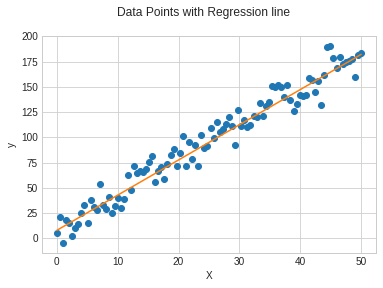

In [13]:
fig = plt.figure()
plt.plot(X, y, 'o')
plt.plot(X, w_final * X + b_final)
fig.suptitle('Data Points with Regression line')
plt.xlabel('X')
plt.ylabel('y');

<hr>